# UNSUPERVISED CLASSIFICATION: K-MEANS

## GOAL: To demonstrate the purpose of unsupervised classification
## GOAL: Show the use of k-means algorithm
## GOAL: Show the pros and cons of k-means, pitfalls and means of avoiding them

### Suggested reading: 
https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means/133841#133841


In [4]:
# Do the necessary imports

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
from random import randint, normalvariate, seed, random
from math import sqrt
import seaborn as sns
%matplotlib inline

In [5]:
# Set the number of clusters and the number of data points

num_clusters = 5
num_points = 500

In [7]:
# Set the random number generator seed, for consistency (same random numbers on each run)

seed(a=101)

In [8]:
# Set the range of data values - from (0, 0) to (max_x, max_y)

max_x = 1000
max_y = 1000

In [9]:
# Randomly choose the centers of the clusters

centers_coords = []

for c in range(0, num_clusters):
    x = float(randint(0, max_x - 1))
    y = float(randint(0, max_y - 1))
    centers_coords.append([x, y])

In [10]:
# Set the size of generated clusters 

sigma_x = 100
sigma_y = 100


In [11]:
# Generate the points. For each point first randomly select a cluster, and then select the point coordinates by
# sampling from a normal distribution with mean at the cluster center and standard deviation (sigma_x, sigma_y)

points = []
true_labels = []

for p in range(0, num_points):
    cl = randint(0, num_clusters - 1)
    x = normalvariate(centers_coords[cl][0], sigma_x)
    y = normalvariate(centers_coords[cl][1], sigma_y)
    points.append([x, y])
    true_labels.append(cl)

points = np.asarray(points) 

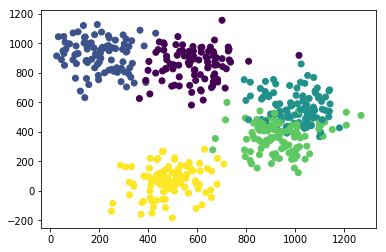

In [12]:
plt.scatter(points[:,0], points[:,1], c=true_labels)

In [13]:
# Call the k-means algorithm. We know the number of clusters and 

kmeans = KMeans(n_clusters=num_clusters, random_state=101).fit(points)

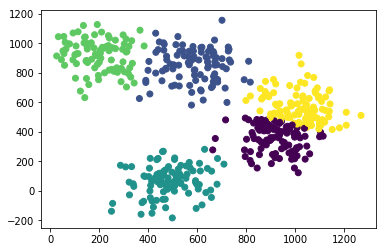

In [14]:
plt.scatter(points[:,0], points[:,1], c=kmeans.labels_)

### Cluster labels assigned by the algorithm do not necessarily coinside with initial labels

### Note 1: the clusters obtained by k-means are always convex. Some other algorithms can produce concave clusters - but not k-means!

### Note 2: Clusters created by k-means will be slightly different if another random seed is used. Clustering results depend on the initial placement of the centroids (see the algorithm for the reminder). 

### Corollary 1: If you have domain knowledge - use it to initialise the cluster centroids, do not use random placement if you can avoid it.

### Corollary 2: If you can't avoid random initialization of the centroids, do not place them randomly in space (especially if your data is high-dimensional!), choose a data point randomly and set a centroid at the same place.

### Corollary 3: Another method is: use histogram methods to find areas with high density of samples, put centroids there.

### Corollary 4: Run k-means with random placement of cluster centers several times if time allows, choose the best result.

## <font color='blue'>What is "best result"? How do we assess the quality numerically?</font>

In [15]:
# Function that calculates a sum of squared errors (SSE)

def calc_SSE(points, labels, centers):
    
    sse = 0.0
    
    for i in range(len(points)):
        p = points[i]
        c = centers[labels[i]]
        sse += (p[0] - c[0]) ** 2 + (p[1] - c[1]) ** 2
    
    return sse

In [16]:
# Compute the SSE of the true point-cluster assignment

ideal_sse = calc_SSE(points, true_labels, centers_coords)
print(ideal_sse)

10310926.4628


In [17]:
# Compute the SSE of the clustering we just computed with kmeans

kmeans_sse = calc_SSE(points, kmeans.labels_, kmeans.cluster_centers_)
print(kmeans_sse)

9352137.07636


## Wooow! The error of clusters produced by kmeans is LESS than the error of true cluster assignment!
### How to explain this?

### It is because our clusters overlap. Sometimes the "true" cluster center is farther away than some other cluster center.

### This example shows that there is no "silver bullet". Minimizing SSE will not solve each and every problem. Deal with it! ))

## What if we do not know the number of clusters in advance? Two methods:
### 1) Try increasing the number of clusters - see where the SSE stops dropping sharply - "The Elbow Method"
### 2) Sometimes instead of number of clusters a maximal diameter of cluster is given. A diameter of a cluster is the distance between its two farthest points.

## How do we make sure that the diameter of each cluster is lower than the threshold?
### ALGORITHM:
### 1. Start with a low number of clusters.
### 2. Compare the diameter of the largest cluster with the threshold.
### 3. If the diameter is bigger - split the largest cluster - run k-means on it alone. Add the produced clusters to your cluster set. Goto 2.
### 3. Otherwise - stop and output the clusters.

## The implementation of this algorithm is left as an exercise to the reader.